**Table of contents**<a id='toc0_'></a>    
- [Import libraries and dataset](#toc1_)    
  - [Inspect dataset](#toc1_1_)    
- [Data cleaning](#toc2_)    
    - [Export survey questions and choices](#toc2_1_1_)    
    - [Create a first copy of the raw dataset, without first row and column](#toc2_1_2_)    
    - [Remove missing values](#toc2_1_3_)    
- [EDA - Univariate](#toc3_)    
  - [Top 15 countries of residence](#toc3_1_)    
  - [Gender distribution](#toc3_2_)    
- [New subset - cleaning Gender categories](#toc4_)    
- [EDA - Plots](#toc5_)    
- [EDA - Bivariate](#toc6_)    
  - [Educational level by Gender](#toc6_1_)    
  - [Age range distribution by Gender](#toc6_2_)    
  - [Gender pay gap](#toc6_3_)    
    - [New subset: clean salary range [Q29]: only professionals [Q5] and employed [Q23]](#toc6_3_1_)    
    - [Convert salary range to midpoint](#toc6_3_2_)    
    - [Gender pay gap visualizations](#toc6_3_3_)    
  - [Chi-square test](#toc6_4_)    
    - [Crosstable: Man, Woman, Nonbinary](#toc6_4_1_)    
    - [Crosstab: only Man and Woman](#toc6_4_2_)    
    - [Chi-square test: gender x salary](#toc6_4_3_)    
  - [Job title by gender](#toc6_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Import libraries and dataset](#toc0_)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

df_raw = pd.read_csv("/Users/work/Documents/DSML25/week_3/3.Project-EDA-Gender/kaggle-survey-2022/kaggle_survey_2022_responses.csv")

/var/folders/_5/9xl167095gn7qzk16djnlv300000gp/T/ipykernel_19433/525742769.py:7: DtypeWarning: Columns (0,15,43,57,73,88,104,118,126,132,170,200,208,215,225,248,255,257,260,270,271,272,277,281,294) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("/Users/work/Documents/DSML25/week_3/3.Project-EDA-Gender/kaggle-survey-2022/kaggle_survey_2022_responses.csv")


## <a id='toc1_1_'></a>[Inspect dataset](#toc0_)

In [2]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


In [3]:
df_raw.shape

(23998, 296)

In [ ]:
df_raw.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


# <a id='toc2_'></a>[Data cleaning](#toc0_)
### <a id='toc2_1_1_'></a>[Export survey questions and choices](#toc0_)

In [ ]:
survey_questions = df_raw.iloc[0]
survey_questions

output_csv_path = "/Users/work/Documents/DSML25/week_3/3.Project-EDA-Gender/EDAg-Datasets/survey_questions_full_text.csv"
survey_questions.to_csv(output_csv_path, index=True)

### <a id='toc2_1_2_'></a>[Create a first copy of the raw dataset, without first row and column](#toc0_)

In [6]:
df = df_raw[1:].copy()
df.drop(columns=["Duration (in seconds)"], inplace=True)

In [7]:
df_export = "/Users/work/Documents/DSML25/week_3/3.Project-EDA-Gender/EDAg-Datasets/responses_clean.csv"
df.to_csv(df_export, index=True)
df.head()

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
1,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,Udacity,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [ ]:
df.shape

(23997, 295)

### <a id='toc2_1_3_'></a>[Remove missing values](#toc0_)

In [9]:
#Delete duplicate rows
print(f"\nNumber of duplicate rows before removal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows before removal: 63
Number of duplicate rows after removal: 0


In [10]:
#Check for missing values - expected in multiple choice questions (all Qn_x)
print("\nMissing Values (NaN) per column:")
print(df.isnull().sum())


Missing Values (NaN) per column:
Q2            0
Q3            0
Q4            0
Q5            0
Q6_1      14243
          ...  
Q44_8     16168
Q44_9     20130
Q44_10    22208
Q44_11    23934
Q44_12    23099
Length: 295, dtype: int64


In [ ]:
#Clean single-choice when needed:
#print(df['q1'].value_counts(dropna=False))

#Fill NaN if appropriate - only when needed:
#df['q1'].fillna('No Response', inplace=True)

#Convert multiple choice to binary when needed:
    #1.Group all columns related to the same question:
    #q6_cols = [col for col in df.columns if col.startswith('Q6_')]

    #2.Convert to binary 0=NaN, 1=selected choice:
    #'''if q6_cols:
     #   for col in q6_cols:
      #      df[col] = df[col].notna().astype(int)
       # else:
         #   print("\nNo columns starting with 'Q6_' found.")'''

# <a id='toc3_'></a>[EDA - Univariate](#toc0_)

## <a id='toc3_1_'></a>[Top 15 countries of residence](#toc0_)
- Geographic Coverage: The survey collected responses from 56 distinct countries/territories, excluding the aggregated "Other" category and any undisclosed locations.
- Respondent Concentration: The participant base is heavily concentrated, with India (8,792 respondents, 36.64%) and the United States of America (2,920 respondents, 12.17%) together accounting for 48.81% of all survey responses.
- Data Aggregation: Consistent with the survey's methodology, countries with fewer than 50 respondents were grouped into an "Other" category (1,430 respondents, 5.96%) for de-identification purposes.
- European Representation: European Union countries show limited participation. France, with 262 respondents (1.09%), is the highest-ranking EU nation among the top 15, placed 15th overall.
- Methodological Bias: The survey's distribution likely introduces a sampling bias. This approach tends to overrepresent regions with high Kaggle community engagement, suggesting that these results may not be generalizable to broader global populations or market distributions, particularly for underrepresented regions like the EU.

![image.png](attachment:image.png)

## <a id='toc3_2_'></a>[Gender distribution](#toc0_)
- The gender distribution: Man around 76%, Woman around 22%, Nonbinary and Self-describe around 0.5%
- Although highly disporportional, this gender representation is in line with global industry trends, that shows a range of 22%-26% for women in AI/ML/Data Science roles globally. Thus, we can consider the analysis as a reflection of the global situation regarding the gender distribution. 
- Important reminder: the same is not valid for region distribution.
- (sources: https://www.weforum.org/publications/gender-parity-in-the-intelligent-age-2025/, https://www.pwc.com/gx/en/about/inclusion/gender-equity/ai-accelerating-womens-inclusion-workplace.html, https://www2.deloitte.com/content/dam/Deloitte/us/Documents/consulting/us-ai-institute-women-in-data-careers.pdf)
- Since we can't know the gender of those who "Prefer not to say" and those who "Self-describe", I removed them from the further analyis.

![image.png](attachment:image.png)

# <a id='toc4_'></a>[New subset - cleaning Gender categories](#toc0_)

In [12]:
#Create a subset with only 3 genders. Called "dfg"
gender_keep = ["Man", "Woman", "Nonbinary"]
dfg = df[df["Q3"].isin(gender_keep)]
dfg_export = "/Users/work/Documents/DSML25/week_3/3.Project-EDA-Gender/EDAg-Datasets/responses_clean_gender.csv"
dfg.to_csv(dfg_export, index=True)
dfg.head()

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
1,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,Udacity,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [ ]:
dfg["Q3"].unique()

array(['Man', 'Woman', 'Nonbinary'], dtype=object)

# <a id='toc5_'></a>[EDA - Plots](#toc0_)

In [14]:
#read the sql queries responses to create visualizations:
country_per = pd.read_csv("/Users/work/Documents/DSML25/week_3/3.Project-EDA-Gender/SQL-answers/country-total.csv")
edu_per = pd.read_csv("/Users/work/Documents/DSML25/week_3/3.Project-EDA-Gender/SQL-answers/education-gender.csv")
gender_per = pd.read_csv("/Users/work/Documents/DSML25/week_3/3.Project-EDA-Gender/SQL-answers/gender.csv")

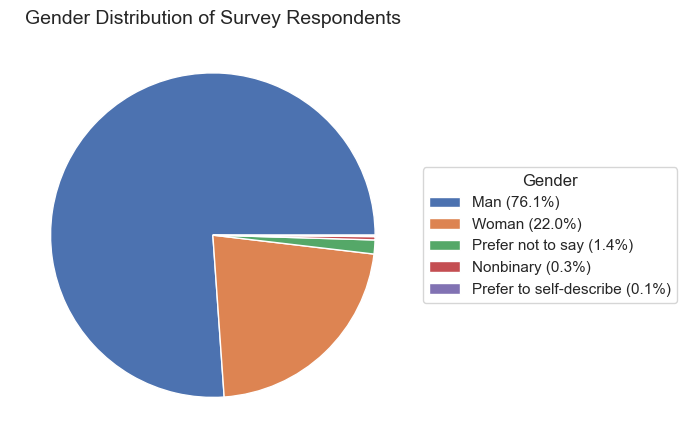

In [15]:
#gender visualization

labels = gender_per['Gender']
sizes = gender_per['Percentage']
plt.pie(sizes,)
legend_labels = [f'{l} ({s:.1f}%)' for l, s in zip(labels, sizes)]
plt.legend(legend_labels,
           title="Gender",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Gender Distribution of Survey Respondents', fontsize=14)
plt.tight_layout()
plt.show()

In [16]:
#country visualization
country_per
country_per.dtypes

Country               object
Total respondents      int64
Percentage           float64
dtype: object

/var/folders/_5/9xl167095gn7qzk16djnlv300000gp/T/ipykernel_19433/1673035687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


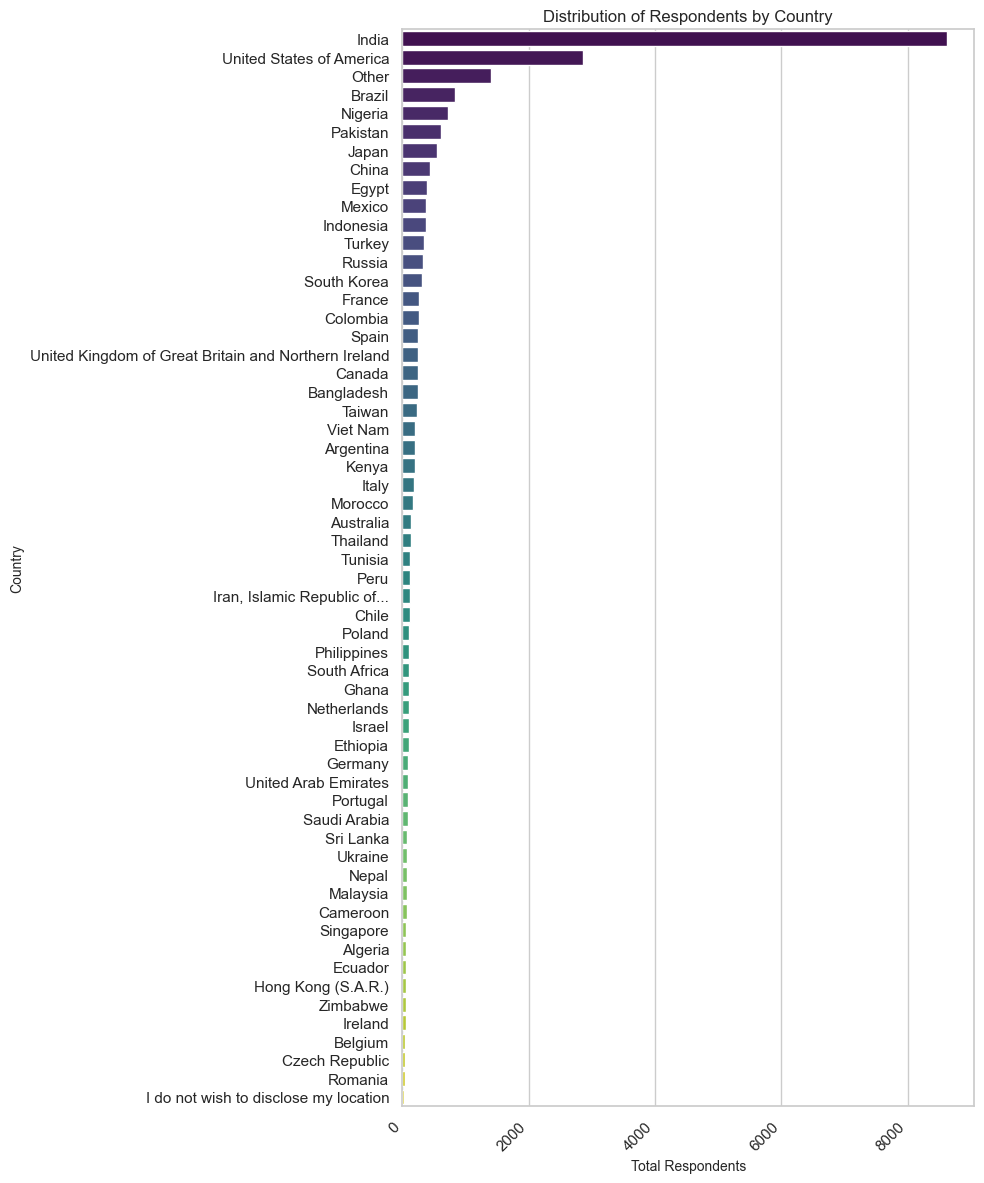

In [ ]:
plt.figure(figsize=(10, 12))
ax = sns.barplot(
    x='Total respondents',
    y='Country',
    data=country_per,
    palette='viridis',
    legend=False)

# Add title and labels
plt.title('Distribution of Respondents by Country', fontsize=12)
plt.xlabel('Total Respondents', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# <a id='toc6_'></a>[EDA - Bivariate](#toc0_)

## <a id='toc6_1_'></a>[Educational level by Gender](#toc0_)
Is there a difference in the level of education among different genders?
- Consistent Foundational Degrees: The most common educational levels across all gender groups are Master's and Bachelor's degrees, showing consistency in proportions:
Master's Degree: Men (39.1%), Women (39.22%), Nonbinary (36.36%)
Bachelor's Degree: Men (33.08%), Women (31.25%), Nonbinary (32.47%)

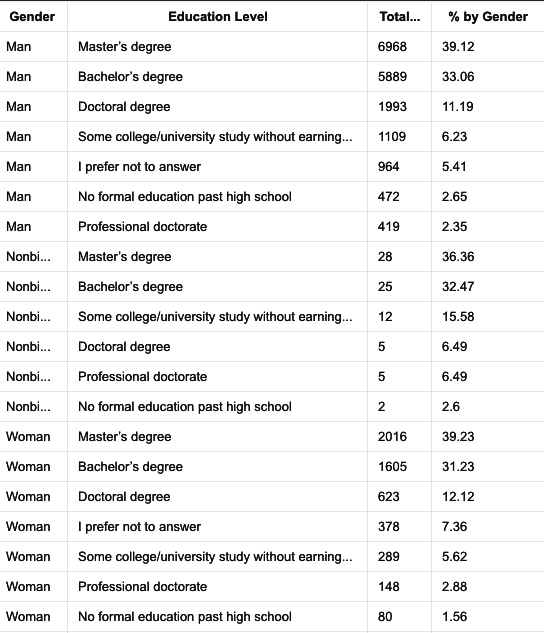

In [18]:
edu_per #SQL query return

,Gender,Education Level,Total Respondents,% by Gender
0,Man,Master’s degree,6968,39.12
1,Man,Bachelor’s degree,5889,33.06
2,Man,Doctoral degree,1993,11.19
3,Man,Some college/university study without earning ...,1109,6.23
4,Man,I prefer not to answer,964,5.41
5,Man,No formal education past high school,472,2.65
6,Man,Professional doctorate,419,2.35
7,Nonbinary,Master’s degree,28,36.36
8,Nonbinary,Bachelor’s degree,25,32.47
9,Nonbinary,Some college/university study without earning ...,12,15.58


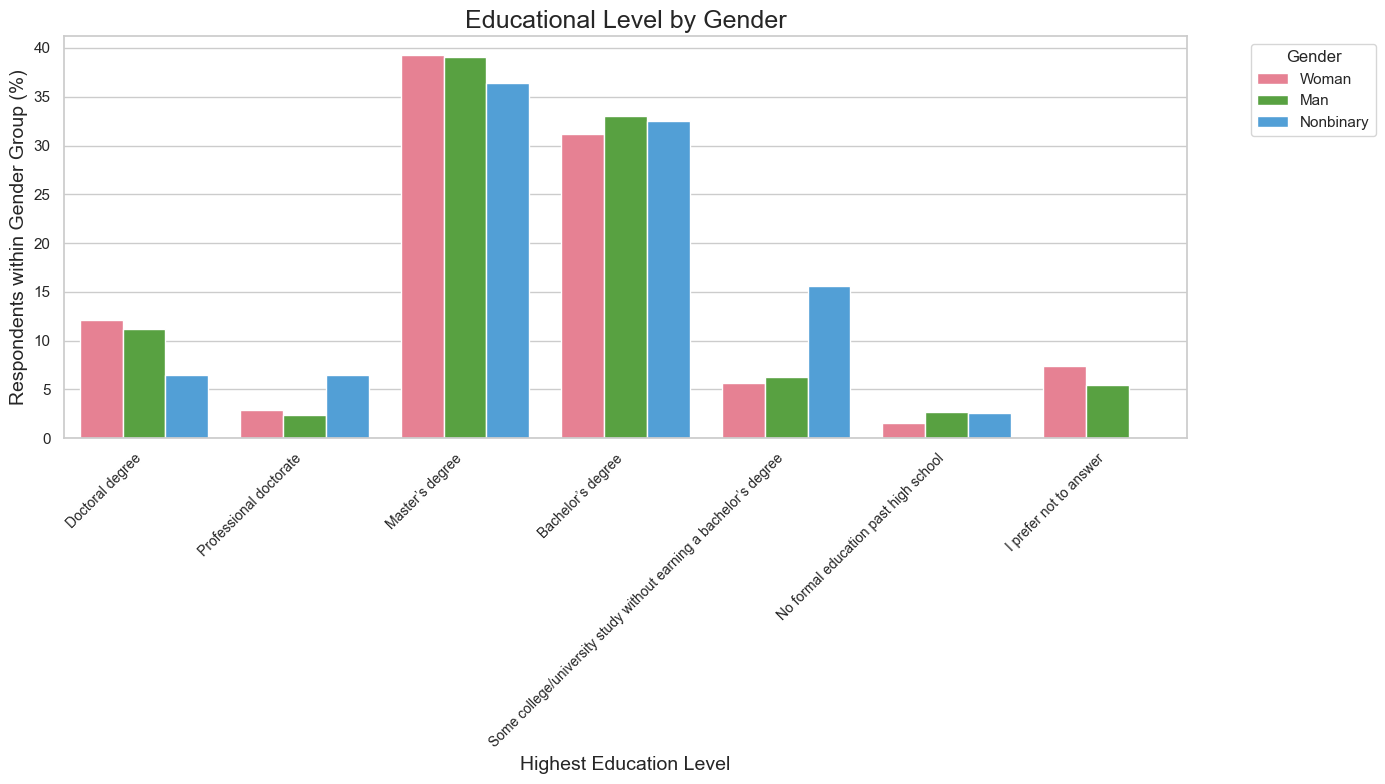

In [ ]:
#Education level by gender
education_order = [
    'Doctoral degree',
    'Professional doctorate',
    'Master’s degree',
    'Bachelor’s degree',
    'Some college/university study without earning a bachelor’s degree',
    'No formal education past high school',
    'I prefer not to answer']

edu_per['Education Level'] = pd.Categorical(
    edu_per['Education Level'],
    categories=education_order,
    ordered=True)

gender_order = ['Woman', 'Man', 'Nonbinary']

plt.figure(figsize=(14, 8)) 
ax = sns.barplot(
    x='Education Level',
    y='% by Gender',
    hue='Gender',
    hue_order=gender_order,
    data=edu_per,
    palette='husl')

plt.title('Educational Level by Gender', fontsize=18)
plt.xlabel('Highest Education Level', fontsize=14)
plt.ylabel('Respondents within Gender Group (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
       
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()        

## <a id='toc6_2_'></a>[Age range distribution by Gender](#toc0_)

In [20]:
#Age by gender
print(dfg['Q2'].unique().tolist())
age_order = ['30-34', '18-21', '55-59', '45-49', '70+', '22-24', '35-39','40-44', '50-54', '25-29', '60-69']
age_order.sort()
dfg.loc[:, 'Q2'] = pd.Categorical(dfg['Q2'], categories=age_order, ordered=True)
print(age_order)

['30-34', '18-21', '55-59', '45-49', '70+', '22-24', '35-39', '40-44', '50-54', '25-29', '60-69']
['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']


['30-34', '18-21', '55-59', '45-49', '70+', '22-24', '35-39', '40-44', '50-54', '25-29', '60-69']
['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']


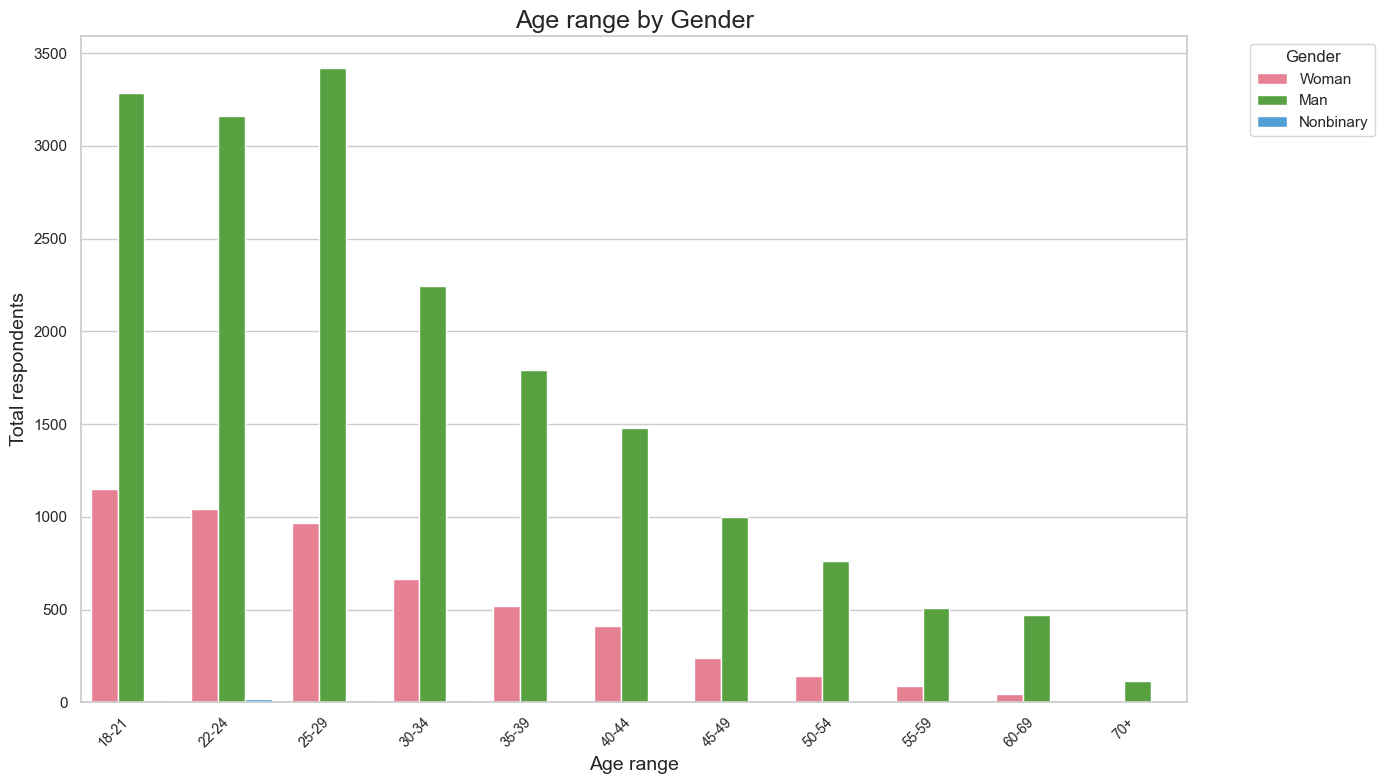

In [21]:
#Age by gender - plot

#Age by gender
print(dfg['Q2'].unique().tolist())
age_order = ['30-34', '18-21', '55-59', '45-49', '70+', '22-24', '35-39','40-44', '50-54', '25-29', '60-69']
age_order.sort()
dfg.loc[:, 'Q2'] = pd.Categorical(dfg['Q2'], categories=age_order, ordered=True)
print(age_order)

#Define the order for age and gender
gender_order = ['Woman', 'Man', 'Nonbinary']
plt.figure(figsize=(14, 8)) 

ax = sns.countplot(
    x= 'Q2',
    hue='Q3',
    hue_order=gender_order,
    data=dfg,
    palette='husl',
    order=age_order
)

plt.title('Age range by Gender', fontsize=18)
plt.xlabel('Age range', fontsize=14)
plt.ylabel('Total respondents', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
       
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()     

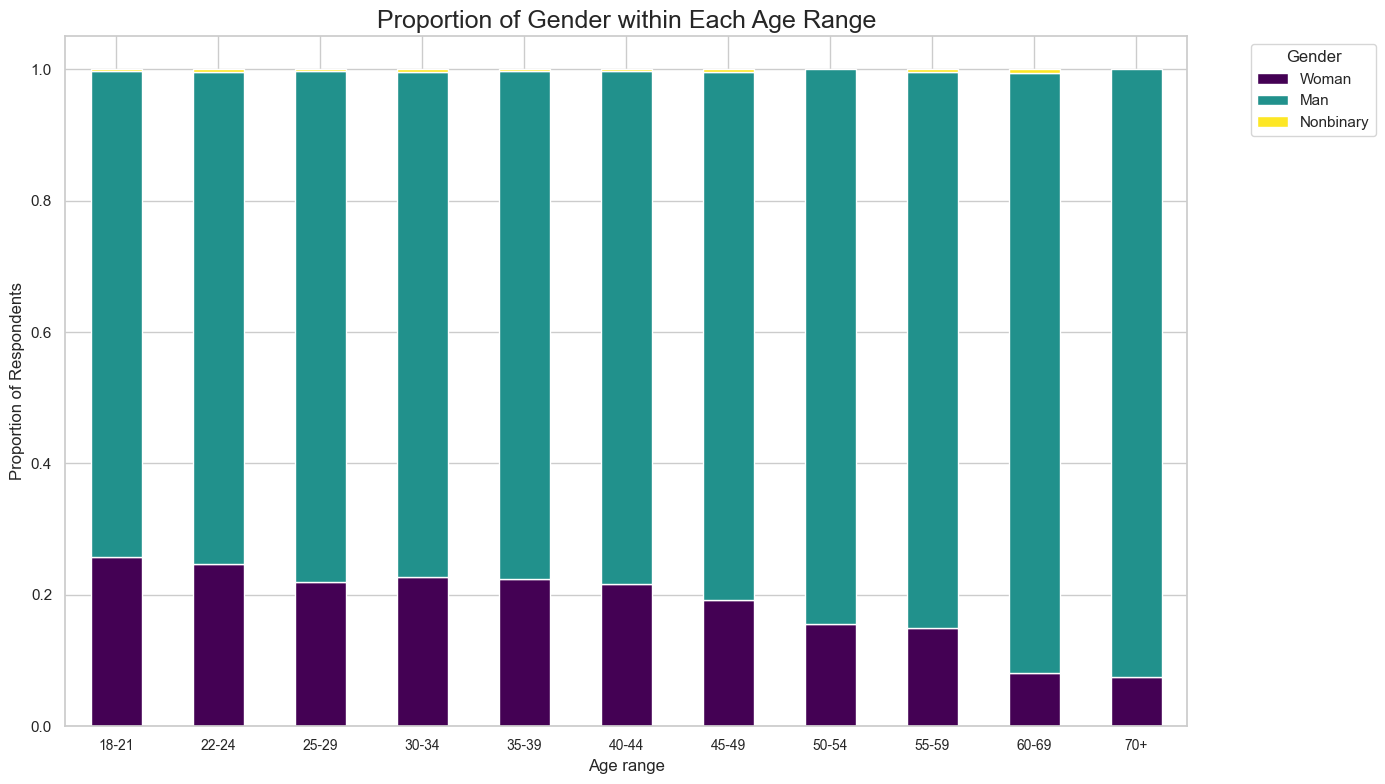

In [22]:
#Age range in percentage
# Calculate proportions within each Q2 group
gender_age_proportions = dfg.groupby('Q2')['Q3'].value_counts(normalize=True).unstack(fill_value=0,)

plt.figure(figsize=(14, 8))
# Ensure the order of hues
gender_age_proportions.loc[:, gender_order].plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

plt.title('Proportion of Gender within Each Age Range', fontsize=18)
plt.xlabel('Age range', fontsize=12)
plt.ylabel('Proportion of Respondents', fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/_5/9xl167095gn7qzk16djnlv300000gp/T/ipykernel_19433/2900213278.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfg_nonbinary, x='Q2', palette='viridis', order=age_order)


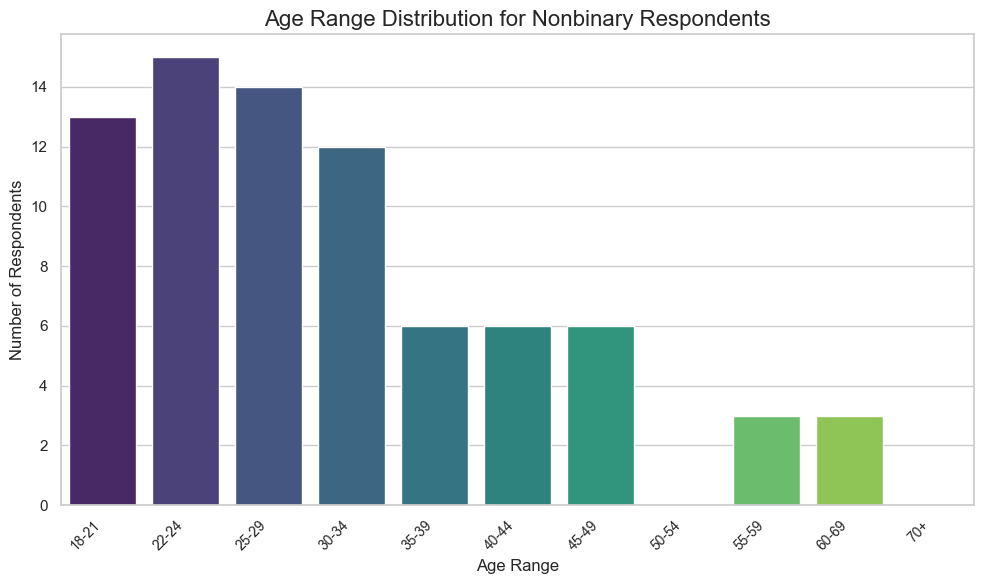

In [ ]:
# Filter the DataFrame for 'Nonbinary' respondents only
dfg_nonbinary = dfg[dfg['Q3'] == 'Nonbinary'].copy()

#Correct order by age
dfg_nonbinary.loc[:, 'Q2'] = pd.Categorical(dfg_nonbinary['Q2'], categories=age_order, ordered=True)

# Create the plot for Nonbinary
plt.figure(figsize=(10, 6))
sns.countplot(data=dfg_nonbinary, x='Q2', palette='viridis', order=age_order)

plt.title('Age Range Distribution for Nonbinary Respondents', fontsize=16)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

/var/folders/_5/9xl167095gn7qzk16djnlv300000gp/T/ipykernel_19433/478438529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg.loc[dfg['Q5'] == 'Yes', 'Q5_label'] = 'Student'


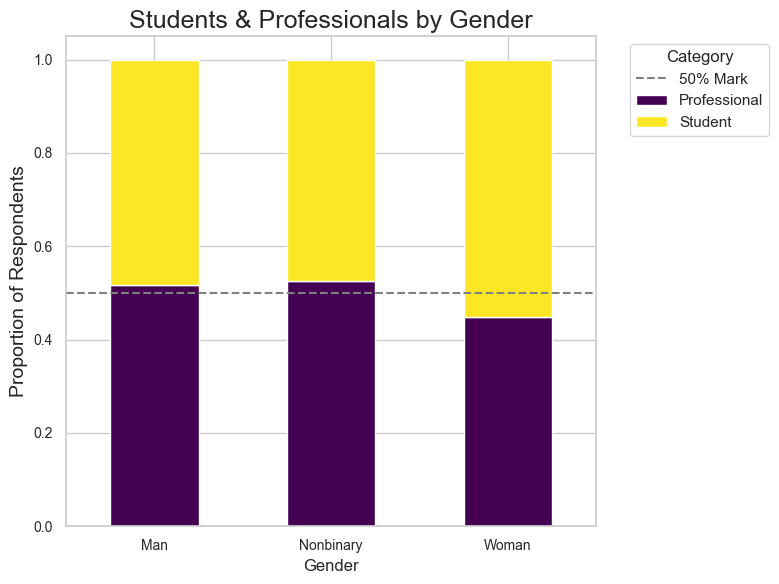

In [ ]:
#Students / Professionals by Gender
# Create a new column 'Q5_label' in dfg
dfg.loc[dfg['Q5'] == 'Yes', 'Q5_label'] = 'Student'
dfg.loc[dfg['Q5'] == 'No', 'Q5_label'] = 'Professional'
# Calculate proportions within each Q5 group
student_prop = dfg.groupby('Q3')['Q5_label'].value_counts(normalize=True).unstack(fill_value=0)

plt.figure(figsize=(8, 6)) 

ax = student_prop.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')

plt.title('Students & Professionals by Gender', fontsize=18)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Proportion of Respondents', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(y=0.5, color='grey', linestyle='--', label='50% Mark')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()  

## <a id='toc6_3_'></a>[Gender pay gap](#toc0_)
Is there a pay gap among gender? 
This question was asked only to respondents who are not students (Q5 = "No") and are not unemployed (Q23 != "unemployed")

### <a id='toc6_3_1_'></a>[New subset: clean salary range [Q29]: only professionals [Q5] and employed [Q23]](#toc0_) [&#8593;](#toc0_)
1. Filter out the students and unemployed
2. Check for missing values after that

In [25]:
dfg_filt = dfg[(dfg['Q5'] == 'No') & (dfg['Q23'] != "unemployed")].copy()
dfg_filt.dropna(subset=['Q29'], inplace=True) #previous Length: 11833 -- new Lenght: 8039
dfg_salary = dfg_filt['Q29']
dfg_salary

4          25,000-29,999
8        100,000-124,999
9        100,000-124,999
14       200,000-249,999
17       200,000-249,999
              ...       
23985    100,000-124,999
23990        2,000-2,999
23991             $0-999
23995      25,000-29,999
23996      15,000-19,999
Name: Q29, Length: 8039, dtype: object

In [26]:
print(dfg_salary.unique())

['25,000-29,999' '100,000-124,999' '200,000-249,999' '150,000-199,999'
 '90,000-99,999' '30,000-39,999' '3,000-3,999' '50,000-59,999'
 '125,000-149,999' '15,000-19,999' '5,000-7,499' '10,000-14,999'
 '20,000-24,999' '$0-999' '7,500-9,999' '4,000-4,999' '80,000-89,999'
 '2,000-2,999' '250,000-299,999' '1,000-1,999' '$500,000-999,999'
 '70,000-79,999' '60,000-69,999' '40,000-49,999' '>$1,000,000'
 '300,000-499,999']


In [27]:
print(dfg_salary.nunique())

26


In [28]:
salary_order = [
    '$0-999',
    '1,000-1,999',
    '2,000-2,999',
    '3,000-3,999',
    '4,000-4,999',
    '5,000-7,499',
    '7,500-9,999',
    '10,000-14,999',
    '15,000-19,999',
    '20,000-24,999',
    '25,000-29,999',
    '30,000-39,999',
    '40,000-49,999',
    '50,000-59,999',
    '60,000-69,999',
    '70,000-79,999',
    '80,000-89,999',
    '90,000-99,999',
    '100,000-124,999',
    '125,000-149,999',
    '150,000-199,999',
    '200,000-249,999',
    '250,000-299,999',
    '300,000-499,999',
    '$500,000-999,999',
    '>$1,000,000'
]

/var/folders/_5/9xl167095gn7qzk16djnlv300000gp/T/ipykernel_19433/284229727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


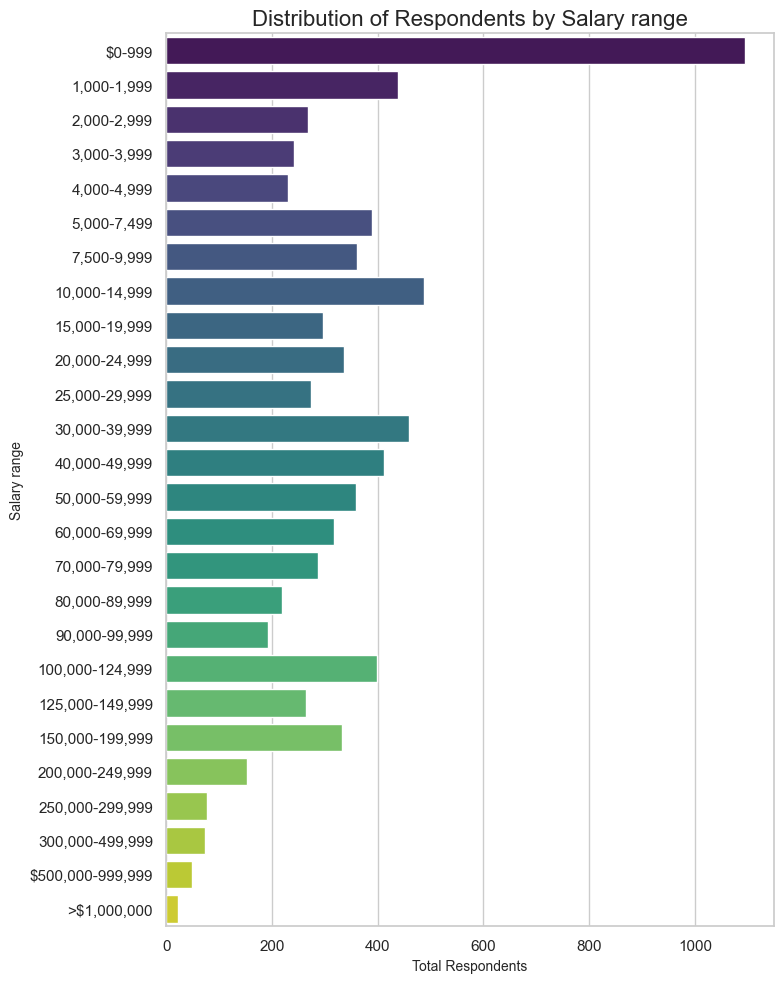

In [29]:
#categorical count of salary range
plt.figure(figsize=(8, 10))
ax = sns.countplot(
    y='Q29',
    data=dfg_filt,
    palette='viridis',
    order=salary_order)

# Add title and labels
plt.title('Distribution of Respondents by Salary range', fontsize=16)
plt.xlabel('Total Respondents', fontsize=10)
plt.ylabel('Salary range', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Get the counts for each salary range
salary_counts = dfg_filt['Q29'].value_counts()

# Convert the Series to a DataFrame
salary_counts_df = salary_counts.reset_index()
salary_counts_df.columns = ['Salary Range', 'Total Respondents']

# Salary range - keep the order
salary_counts_df['Salary Range'] = pd.Categorical(
    salary_counts_df['Salary Range'],
    categories=salary_order,
    ordered=True)

salary_counts_df = salary_counts_df.sort_values('Salary Range')

# Export to CSV
salary_counts_df.to_csv('salary_range_data.csv', index=False)

### <a id='toc6_3_2_'></a>[Convert salary range to midpoint](#toc0_)
Midpoint = the average of each range. Ex: first range 0-999, midpoint is (0+999)/2=499.5

In [ ]:
def convert_salary_range_to_midpoint(salary_range):
    if pd.isna(salary_range):
        return np.nan
    
    salary_range = str(salary_range).replace('$', '').replace(',', '').strip()

    if '-' in salary_range:
        parts = salary_range.split('-')
        try:
            lower = float(parts[0])
            upper = float(parts[1])
            return (lower + upper) / 2
        except ValueError:
            return np.nan # Handle cases where parts are not valid numbers
    elif '+' in salary_range or '>' in salary_range:
        try:
            clean_num_str = (salary_range.replace('+', '').replace('>', ''))
            return float(clean_num_str)
        except ValueError:
            return np.nan
    else: # Handle single numbers if any, or like 'No income' if any
        try:
            return float(salary_range)
        except ValueError:
            return np.nan

In [ ]:
#apply function to filtered dataframe (without students and unemployed)
dfg_filt.loc[:, 'Q29_midpoint'] = dfg_filt['Q29'].apply(convert_salary_range_to_midpoint)
print(dfg_filt['Q29_midpoint'].head())
print(round(dfg_filt['Q29_midpoint'].describe()))
print(dfg_filt['Q29_midpoint'].unique())
print(dfg_filt['Q29_midpoint'].nunique())

4      27499.5
8     112499.5
9     112499.5
14    224999.5
17    224999.5
Name: Q29_midpoint, dtype: float64
count       8039.0
mean       56193.0
std        98818.0
min          500.0
25%         3500.0
50%        22500.0
75%        75000.0
max      1000000.0
Name: Q29_midpoint, dtype: float64
[2.749950e+04 1.124995e+05 2.249995e+05 1.749995e+05 9.499950e+04
 3.499950e+04 3.499500e+03 5.499950e+04 1.374995e+05 1.749950e+04
 6.249500e+03 1.249950e+04 2.249950e+04 4.995000e+02 8.749500e+03
 4.499500e+03 8.499950e+04 2.499500e+03 2.749995e+05 1.499500e+03
 7.499995e+05 7.499950e+04 6.499950e+04 4.499950e+04 1.000000e+06
 3.999995e+05]
26


### <a id='toc6_3_3_'></a>[Gender pay gap visualizations](#toc0_)

/var/folders/_5/9xl167095gn7qzk16djnlv300000gp/T/ipykernel_19433/3738186021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


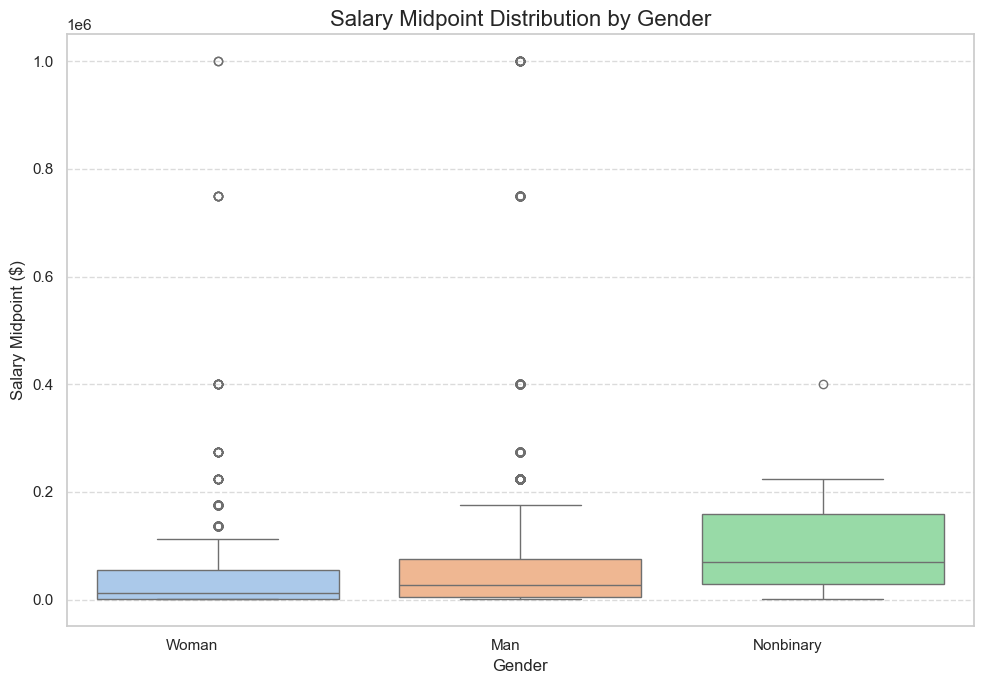


Median Salary Midpoint by Gender:
Q3
Nonbinary    69999.5
Man          27499.5
Woman        12499.5
Name: Q29_midpoint, dtype: float64

Mean Salary Midpoint by Gender:
Q3
Nonbinary    101863.0
Man           58756.0
Woman         43160.0
Name: Q29_midpoint, dtype: float64


In [33]:
plt.figure(figsize=(10, 7))

# Create the box plot
ax = sns.boxplot(
    x='Q3',             # Categorical variable (Gender) on the x-axis
    y='Q29_midpoint',   # Numerical variable (Salary Midpoint) on the y-axis
    data=dfg_filt,      
    palette='pastel',   
    order=gender_order 
)

# Add title and labels
plt.title('Salary Midpoint Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Salary Midpoint ($)', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Statistics
print("\nMedian Salary Midpoint by Gender:")
print(dfg_filt.groupby('Q3')['Q29_midpoint'].median().sort_values(ascending=False))

print("\nMean Salary Midpoint by Gender:")
print(round(dfg_filt.groupby('Q3')['Q29_midpoint'].mean().sort_values(ascending=False),))

/var/folders/_5/9xl167095gn7qzk16djnlv300000gp/T/ipykernel_19433/2798444175.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


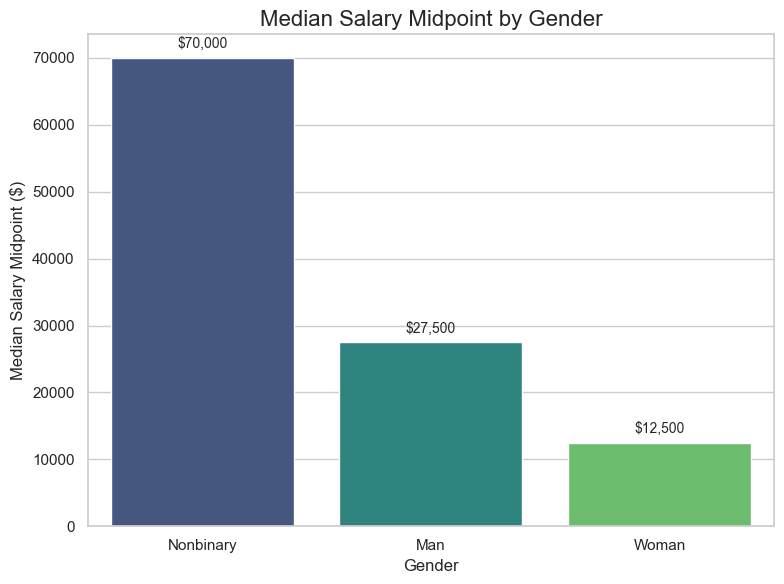

In [34]:
median_salary_by_gender = dfg_filt.groupby('Q3')['Q29_midpoint'].median().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=median_salary_by_gender.index, # Genders on the x-axis
    y=median_salary_by_gender.values, # Median salaries on the y-axis
    palette='viridis'
)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Median Salary Midpoint by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Median Salary Midpoint ($)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/_5/9xl167095gn7qzk16djnlv300000gp/T/ipykernel_19433/2903685527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


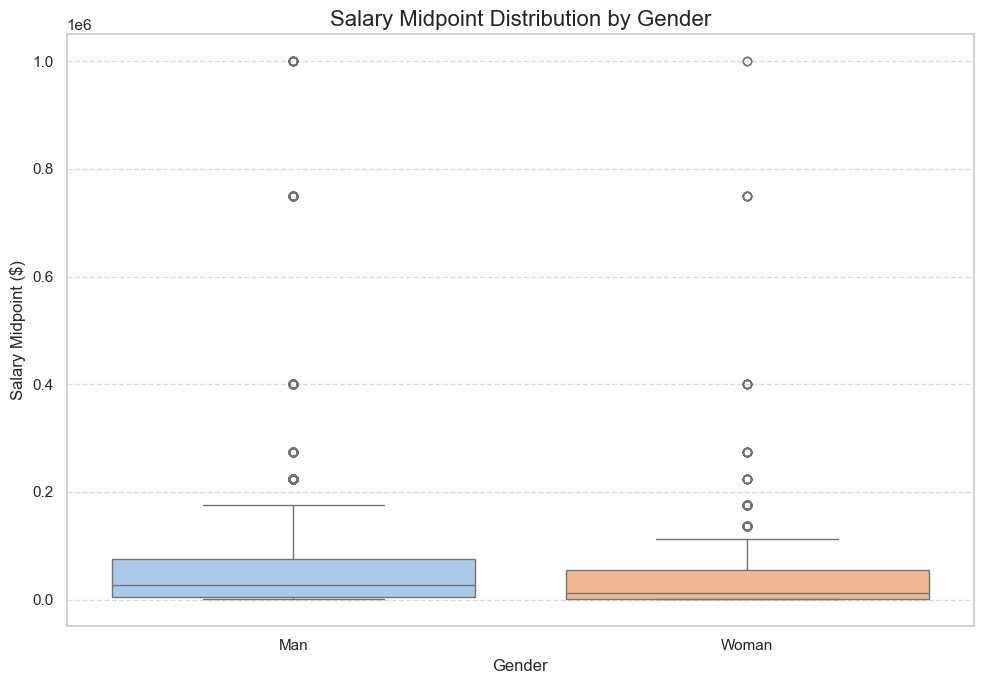


Median Salary Midpoint by Gender:
Q3
Man      27499.5
Woman    12499.5
Name: Q29_midpoint, dtype: float64

Mean Salary Midpoint by Gender:
Q3
Man      58756.0
Woman    43160.0
Name: Q29_midpoint, dtype: float64


In [ ]:
#Filter man and woman only
dfg_wm = dfg_filt[dfg_filt['Q3'].isin(['Man', 'Woman'])].copy()

#plot only man and woman

plt.figure(figsize=(10, 7))

# Create the box plot
ax = sns.boxplot(
    x='Q3',             # Categorical variable (Gender) on the x-axis
    y='Q29_midpoint',   # Numerical variable (Salary Midpoint) on the y-axis
    data=dfg_wm,      
    palette='pastel',   
    order=['Man', 'Woman']
)

# Add title and labels
plt.title('Salary Midpoint Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Salary Midpoint ($)', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Statistics
print("\nMedian Salary Midpoint by Gender:")
print(dfg_wm.groupby('Q3')['Q29_midpoint'].median().sort_values(ascending=False))

print("\nMean Salary Midpoint by Gender:")
print(round(dfg_wm.groupby('Q3')['Q29_midpoint'].mean().sort_values(ascending=False),))

In [ ]:
# Convert the Series to a DataFrame
median_salary_df = median_salary_by_gender.reset_index()

# Rename the columns for clarity in the CSV
median_salary_df.columns = ['Gender', 'Median Salary Midpoint']

# Export to CSV
median_salary_df.to_csv('median_salary_by_gender.csv', index=False)

## <a id='toc6_4_'></a>[Chi-square test](#toc0_)

In [ ]:
from scipy.stats import chi2_contingency

### <a id='toc6_4_1_'></a>[Crosstable: Man, Woman, Nonbinary](#toc0_)

In [40]:
crosstab_paygap = pd.crosstab(dfg_filt['Q29'], dfg_filt['Q3'])
crosstab_paygap

Q3,Man,Nonbinary,Woman
Q29,,,
$0-999,797,2,296
"$500,000-999,999",43,0,5
"1,000-1,999",354,0,85
"10,000-14,999",401,0,86
"100,000-124,999",339,4,56
"125,000-149,999",220,0,45
"15,000-19,999",241,0,56
"150,000-199,999",289,2,42
"2,000-2,999",216,1,52


<Axes: xlabel='Q3', ylabel='Q29'>

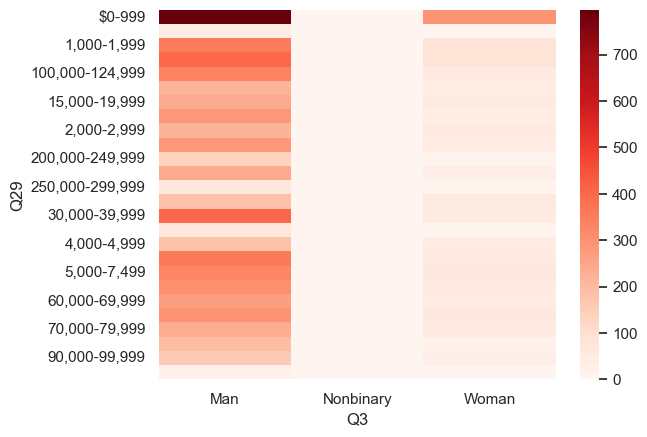

In [ ]:
sns.heatmap(crosstab_paygap, annot=False, cmap="Reds", fmt="d")

### <a id='toc6_4_2_'></a>[Crosstab: only Man and Woman](#toc0_)

In [ ]:
crosstab_paygap2 = pd.crosstab(dfg_wm['Q29'], dfg_wm['Q3'])

### <a id='toc6_4_3_'></a>[Chi-square test: gender x salary](#toc0_)

In [62]:
_, chi2_pvalue, _, _  = chi2_contingency(crosstab_paygap)
print(float(chi2_pvalue))
print(float(chi2_pvalue) < 0.05)

2.0422246648812616e-16
True


In [58]:
_, chi2_pvalue, _, _  = chi2_contingency(crosstab_paygap2)
print(float(chi2_pvalue))
print(float(chi2_pvalue) < 0.05)

6.146576306657101e-18
True


<Axes: xlabel='Q3', ylabel='Q29'>

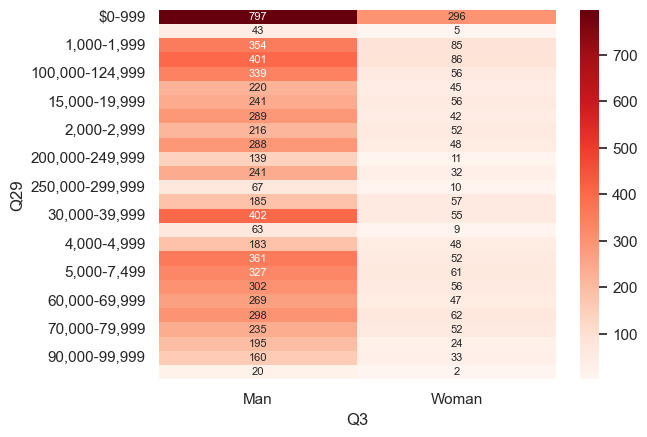

In [68]:
sns.heatmap(crosstab_paygap2, annot=True, cmap="Reds", fmt="d", annot_kws={"fontsize": 8})

<Axes: xlabel='Q3', ylabel='Q29'>

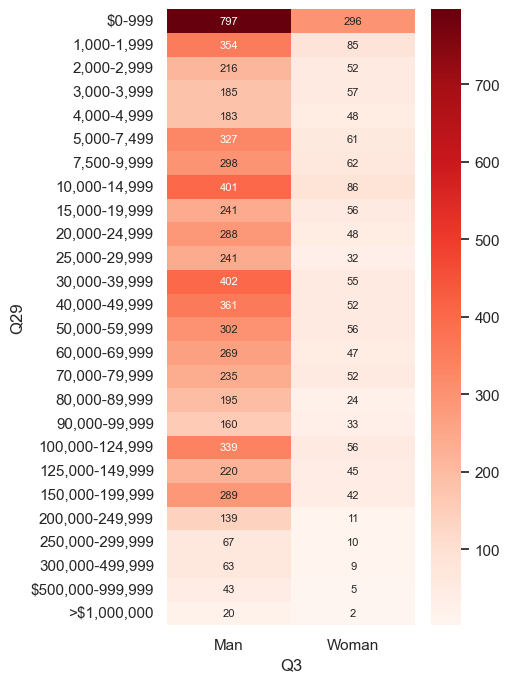

In [ ]:
#Show salary in asc order
crosstab_ordered = crosstab_paygap2.reindex(salary_order)
plt.figure(figsize=(4, 8))
sns.heatmap(crosstab_ordered, annot=True, cmap="Reds", fmt="d", annot_kws={"fontsize": 8})

## <a id='toc6_5_'></a>[Job title by gender](#toc0_)

In [75]:
crosstab_job2 = pd.crosstab(dfg_wm['Q23'], dfg_wm['Q3'])
crosstab_job2

Q3,Man,Woman
Q23,,
Data Administrator,54,13
"Data Analyst (Business, Marketing, Financial, Quantitative, etc)",1065,275
Data Architect,72,8
Data Engineer,241,39
Data Scientist,1424,261
Developer Advocate,44,8
Engineer (non-software),364,45
Machine Learning/ MLops Engineer,444,49
"Manager (Program, Project, Operations, Executive-level, etc)",649,82


In [76]:
crosstab_job = pd.crosstab(dfg_filt['Q23'], dfg_filt['Q3'])
crosstab_job

Q3,Man,Nonbinary,Woman
Q23,,,
Data Administrator,54,0,13
"Data Analyst (Business, Marketing, Financial, Quantitative, etc)",1065,3,275
Data Architect,72,0,8
Data Engineer,241,0,39
Data Scientist,1424,5,261
Developer Advocate,44,0,8
Engineer (non-software),364,1,45
Machine Learning/ MLops Engineer,444,1,49
"Manager (Program, Project, Operations, Executive-level, etc)",649,5,82


<Axes: xlabel='Q3', ylabel='Q23'>

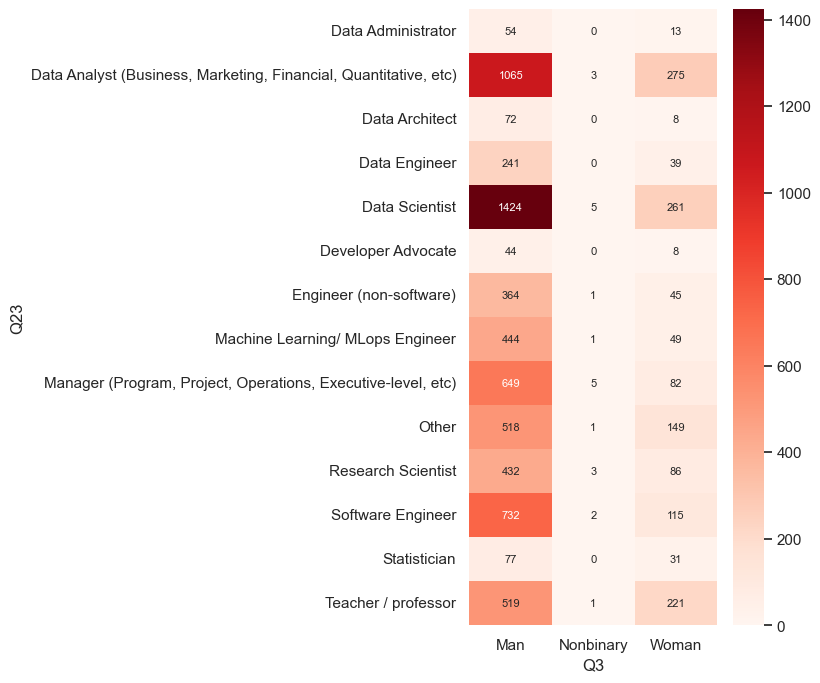

In [77]:
plt.figure(figsize=(4, 8))
sns.heatmap(crosstab_job, annot=True, cmap="Reds", fmt="d", annot_kws={"fontsize": 8})

/var/folders/_5/9xl167095gn7qzk16djnlv300000gp/T/ipykernel_19433/1789530781.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


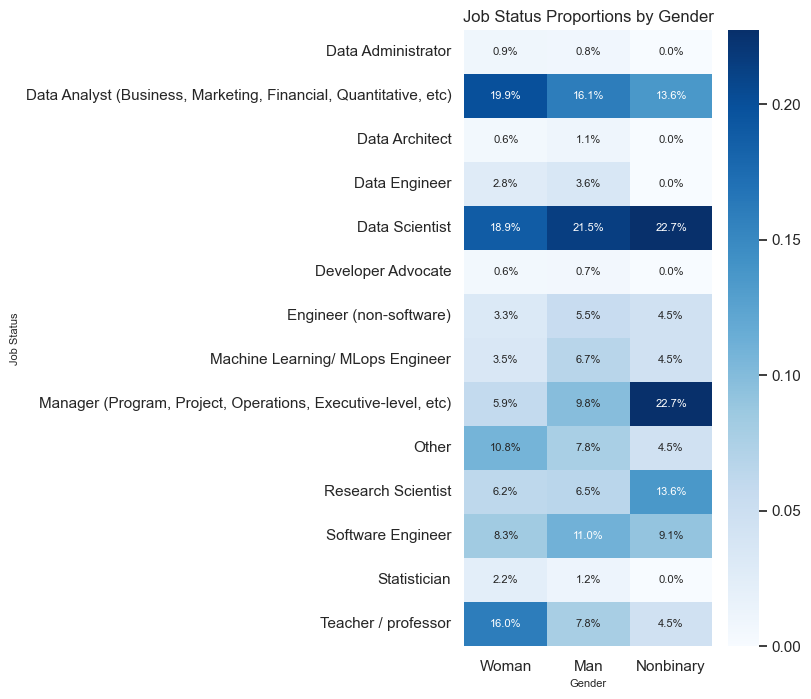

In [82]:
crosstab_job_prop = pd.crosstab(dfg_filt['Q23'], dfg_filt['Q3'], normalize='columns').reindex(columns=gender_order)

plt.figure(figsize=(4, 8))
sns.heatmap(crosstab_job_prop, annot=True, cmap="Blues", fmt=".1%", annot_kws={"fontsize": 8})
plt.xlabel('Gender', fontsize=8)
plt.ylabel('Job Status', fontsize=8)
plt.title('Job Status Proportions by Gender', fontsize=12)
plt.tight_layout()
plt.show()